# House Price Regression Project
Using house price advanced regression techniques data set from kaggle.com <br>
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In this project I used a variety of machine learning techniques on labelled housing data from kaggle.com to predict the sales price of a house from a wide range of feature variables.

### Retrieve Data 

In [ ]:
#Retrieve data from kaggle.com and unzip
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c house-prices-advanced-regression-techniques
!unzip house-prices-advanced-regression-techniques.zip

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 58.3MB/s]
Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df_train = pd.read_csv('train.csv')

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_test = pd.read_csv('test.csv')

In [ ]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Preliminary Data Analysis

In [ ]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


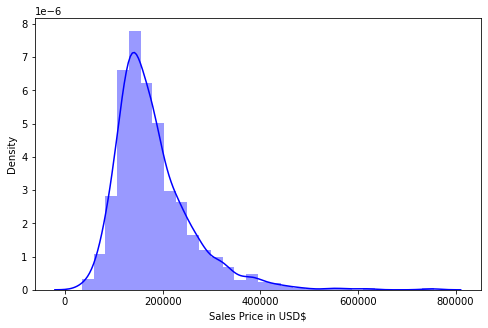

In [ ]:
#Investigate training data sales price distribution
plt.figure(figsize=(8,5))
sns.distplot(x = df_train['SalePrice'],bins=30,color='blue')
plt.xlabel('Sales Price in USD$')
plt.show()

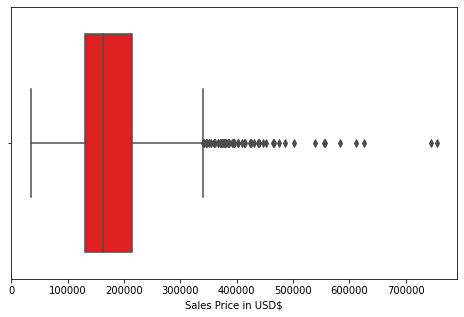

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x = df_train['SalePrice'],color='red')
plt.xlabel('Sales Price in USD$')
plt.show()

In [ ]:
#Remove two outlier values, as these are likely to skew the models
df_train = df_train[df_train['SalePrice']<700000]

In [ ]:
df_train.isnull().sum().sort_values(ascending = False).head(20)

PoolQC          1452
MiscFeature     1404
Alley           1367
Fence           1178
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

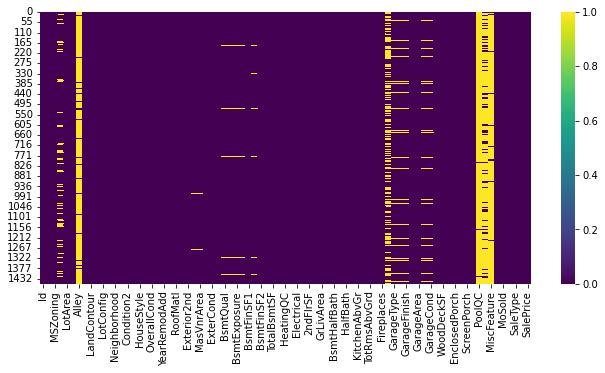

In [ ]:
plt.figure(figsize=(11,5))
sns.heatmap(df_train.isnull(),cmap='viridis')

In [ ]:
#Let's see which variables are most strongly correlated with the sale price
df_train.corr().loc['SalePrice'].sort_values(ascending=False).head(18)

SalePrice       1.000000
OverallQual     0.795998
GrLivArea       0.693557
GarageCars      0.648619
GarageArea      0.631105
TotalBsmtSF     0.608769
1stFlrSF        0.599437
FullBath        0.557558
YearBuilt       0.534565
TotRmsAbvGrd    0.533410
YearRemodAdd    0.520809
GarageYrBlt     0.498428
MasVnrArea      0.473574
Fireplaces      0.463831
BsmtFinSF1      0.373394
LotFrontage     0.338406
OpenPorchSF     0.324981
WoodDeckSF      0.322200
Name: SalePrice, dtype: float64

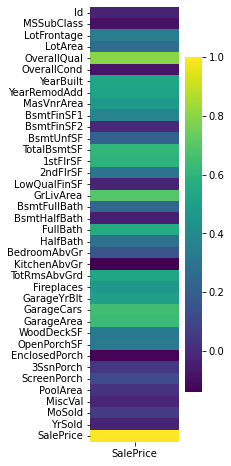

In [ ]:
#Investigate how strongly the variables are correlated with the sale price
plt.figure(figsize=(2,8))
sns.heatmap(df_train.corr()[['SalePrice']],cmap='viridis')

In [ ]:
year = df_train.groupby('YrSold')['SalePrice'].mean()
year

YrSold
2006    182549.458599
2007    182613.996942
2008    177360.838816
2009    179432.103550
2010    177393.674286
Name: SalePrice, dtype: float64

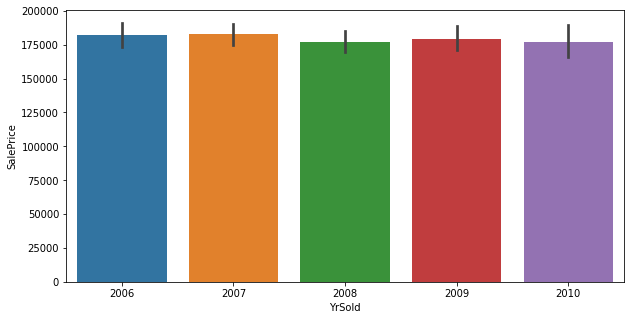

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'YrSold', y = 'SalePrice', data = df_train)
plt.show()

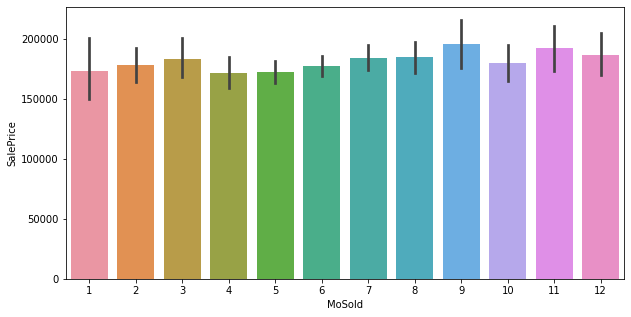

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'MoSold', y = 'SalePrice', data = df_train)
plt.show()

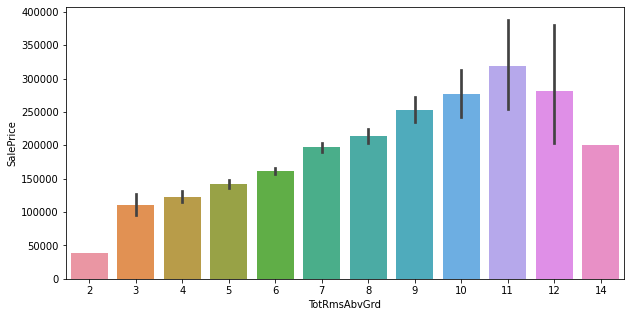

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'TotRmsAbvGrd', y = 'SalePrice', data = df_train)
plt.show()

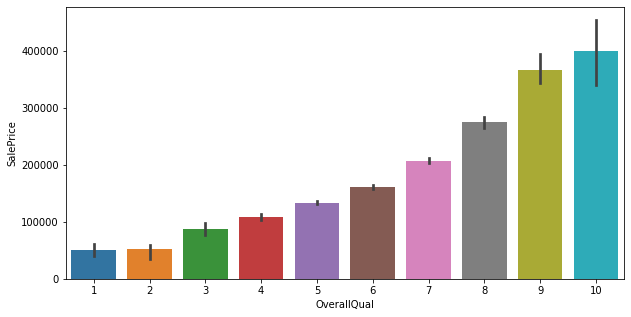

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'OverallQual', y = 'SalePrice', data = df_train)
plt.show()

In [ ]:
X = df_train[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 
              'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF']]
X.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF
0,7,1710,2,548,856,856,2,8,2003,2003,2003.0,196.0,0,706,65.0,0,854
1,6,1262,2,460,1262,1262,2,6,1976,1976,1976.0,0.0,1,978,80.0,298,0
2,7,1786,2,608,920,920,2,6,2001,2002,2001.0,162.0,1,486,68.0,0,866
3,7,1717,3,642,756,961,1,7,1915,1970,1998.0,0.0,1,216,60.0,0,756
4,8,2198,3,836,1145,1145,2,9,2000,2000,2000.0,350.0,1,655,84.0,192,1053


In [ ]:
y = df_train['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

### Data Cleaning and Scaling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

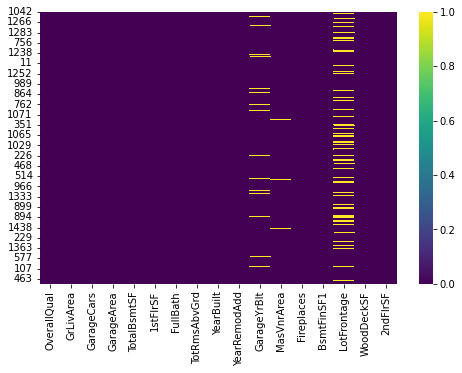

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(X_train.isnull(),cmap='viridis')

In [ ]:
X_train['GarageYrBlt'].fillna(value=X_train['GarageYrBlt'].mean(), inplace=True)
X_train['MasVnrArea'].fillna(value=X_train['MasVnrArea'].mean(), inplace=True)
X_train['LotFrontage'].fillna(value=X_train['LotFrontage'].mean(), inplace=True)

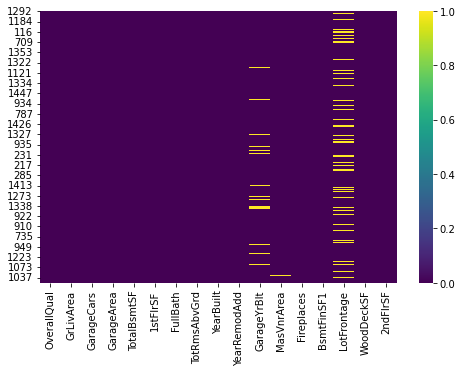

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(X_test.isnull(),cmap='viridis')

In [ ]:
X_test['GarageYrBlt'].fillna(value=X_test['GarageYrBlt'].mean(), inplace=True)
X_test['MasVnrArea'].fillna(value=X_test['MasVnrArea'].mean(), inplace=True)
X_test['LotFrontage'].fillna(value=X_test['LotFrontage'].mean(), inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Application of Machine Learning Models for House Price Prediction

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(lm.intercept_)
print('Coefficients: \n', lm.coef_)

180918.90222984558
Coefficients: 
 [26053.95238914 -4260.59205667  8051.16534024  1810.69006639
  4842.28885979 17437.72358916  -500.56412474  6973.66766904
  4907.61025184  7922.02532614   141.28148736  4343.71688938
  5867.72817049  8026.00446895   222.19107741  3945.83724204
 14679.6025863 ]


In [ ]:
coeff = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff

,Coefficient
OverallQual,26053.952389
GrLivArea,-4260.592057
GarageCars,8051.165340
GarageArea,1810.690066
TotalBsmtSF,4842.288860
1stFlrSF,17437.723589
FullBath,-500.564125
TotRmsAbvGrd,6973.667669
YearBuilt,4907.610252
YearRemodAdd,7922.025326


In [ ]:
predictions = lm.predict(X_test)

Text(0.5, 1.0, 'Comparison of y predicted value against test value')

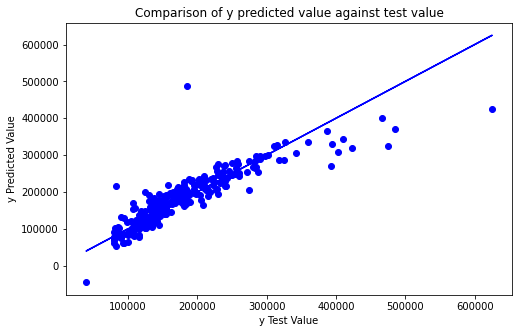

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,predictions,color='blue')
plt.plot(y_test,y_test,color='blue')
plt.ylabel('y Predicted Value')
plt.xlabel('y Test Value')
plt.title('Comparison of y predicted value against test value')
#plots the actual y values y_test, against the y values predicted by the trained model

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 Score:', metrics.r2_score(y_test, predictions))

MAE: 21809.185512291864
MSE: 1292222509.5113478
RMSE: 35947.49656806921
R2 Score: 0.7843843911400961


(-80000.0, 80000.0)

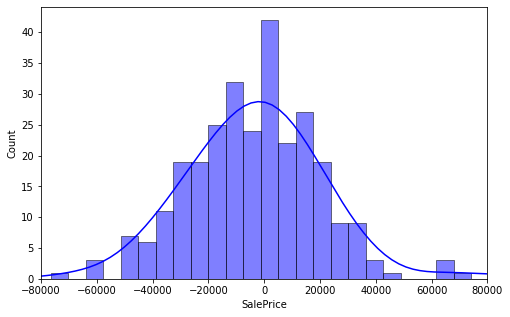

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot((y_test-predictions),bins=80,kde=True,color='blue')
plt.xlim(-80000,80000)
#plots a histogram of the residual values of y
#distribution is approximately normal about zero, as expected for a good fit

In [ ]:
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 500)
xgb_r.fit(X_train, y_train)

XGBRegressor(n_estimators=500, objective='reg:squarederror')

In [ ]:
xgbpredictions = xgb_r.predict(X_test)

Text(0.5, 1.0, 'Comparison of y predicted value against test value')

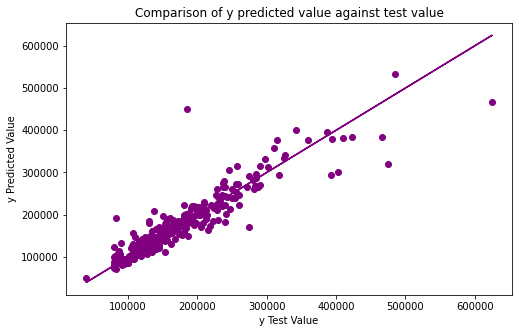

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,xgbpredictions,color='purple')
plt.plot(y_test,y_test,color='purple')
plt.ylabel('y Predicted Value')
plt.xlabel('y Test Value')
plt.title('Comparison of y predicted value against test value')
#plots the actual y values y_test, against the y values predicted by the trained model

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, xgbpredictions))
print('MSE:', metrics.mean_squared_error(y_test, xgbpredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgbpredictions)))
print('R2 Score:', metrics.r2_score(y_test, xgbpredictions))

MAE: 17750.74777932363
MSE: 963356975.624848
RMSE: 31037.99245481009
R2 Score: 0.8392577134975505


(-80000.0, 80000.0)

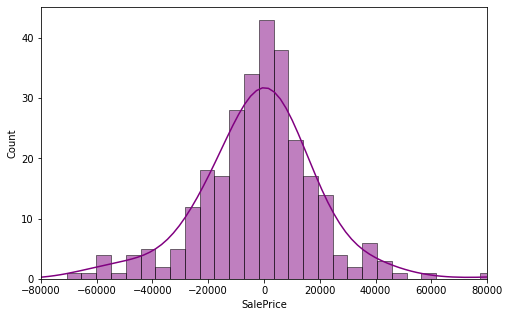

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot((y_test-xgbpredictions),bins=80,kde=True,color='purple')
plt.xlim(-80000,80000)
#plots a histogram of the residual values of y

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
X_train.shape
#17 input variables, so we require 17 inputs to neural network

(1166, 17)

In [ ]:
model = Sequential()
#define number of model layers and number of neurons in each layer
model.add(Dense(units=17,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=17,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=17,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=17,activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(1))
# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(x=X_train,y=y_train,validation_data=(X_test, y_test),epochs=300,batch_size=50)

Epoch 1/300
24/24 [==============================] - 2s 21ms/step - loss: 38568357888.0000 - val_loss: 37333430272.0000
Epoch 2/300
24/24 [==============================] - 0s 8ms/step - loss: 38567972864.0000 - val_loss: 37332811776.0000
Epoch 3/300
24/24 [==============================] - 0s 9ms/step - loss: 38566879232.0000 - val_loss: 37330870272.0000
Epoch 4/300
24/24 [==============================] - 0s 7ms/step - loss: 38563418112.0000 - val_loss: 37324529664.0000
Epoch 5/300
24/24 [==============================] - 0s 8ms/step - loss: 38552281088.0000 - val_loss: 37304504320.0000
Epoch 6/300
24/24 [==============================] - 0s 10ms/step - loss: 38519963648.0000 - val_loss: 37251063808.0000
Epoch 7/300
24/24 [==============================] - 0s 12ms/step - loss: 38443130880.0000 - val_loss: 37128183808.0000
Epoch 8/300
24/24 [==============================] - 0s 10ms/step - loss: 38272348160.0000 - val_loss: 36876845056.0000
Epoch 9/300
24/24 [=========================

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,val_loss
0,3.856836e+10,3.733343e+10
1,3.856797e+10,3.733281e+10
2,3.856688e+10,3.733087e+10
3,3.856342e+10,3.732453e+10
4,3.855228e+10,3.730450e+10


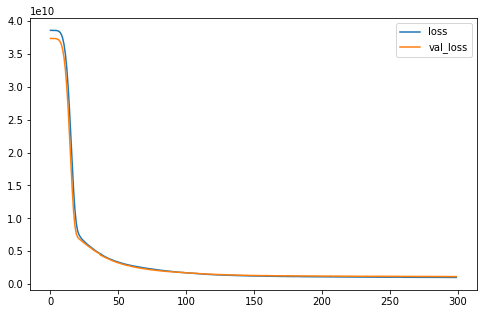

In [ ]:
model_loss.plot(figsize=(8,5))

In [ ]:
neural_pred = model.predict(X_test)
neural_pred = neural_pred.reshape(len(neural_pred))

Text(0.5, 1.0, 'Comparison of y predicted value against test value')

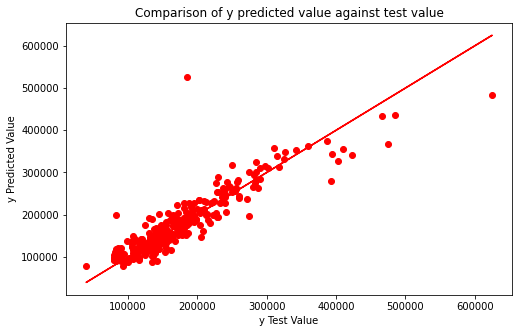

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,neural_pred,color='red')
plt.plot(y_test,y_test,color='red')
plt.ylabel('y Predicted Value')
plt.xlabel('y Test Value')
plt.title('Comparison of y predicted value against test value')
#plots the actual y values y_test, against the y values predicted by the trained model

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, neural_pred))
print('MSE:', metrics.mean_squared_error(y_test, neural_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, neural_pred)))
print('R2 Score:', metrics.r2_score(y_test, neural_pred))

MAE: 20685.116786172945
MSE: 1145779677.4889257
RMSE: 33849.367460691574
R2 Score: 0.8088193163617774


(-80000.0, 80000.0)

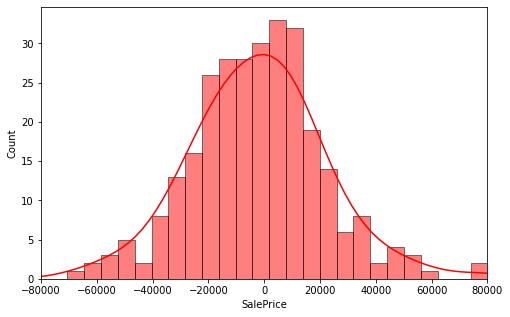

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot((y_test-neural_pred),bins=80,kde=True,color='red')
plt.xlim(-80000,80000)
#plots a histogram of the residual values of y

In [ ]:
test = df_test[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 
              'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF']]
test.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF
0,5,896,1.0,730.0,882.0,896,1,5,1961,1961,1961.0,0.0,0,468.0,80.0,140,0
1,6,1329,1.0,312.0,1329.0,1329,1,6,1958,1958,1958.0,108.0,0,923.0,81.0,393,0
2,5,1629,2.0,482.0,928.0,928,2,6,1997,1998,1997.0,0.0,1,791.0,74.0,212,701
3,6,1604,2.0,470.0,926.0,926,2,7,1998,1998,1998.0,20.0,1,602.0,78.0,360,678
4,8,1280,2.0,506.0,1280.0,1280,2,5,1992,1992,1992.0,0.0,0,263.0,43.0,0,0


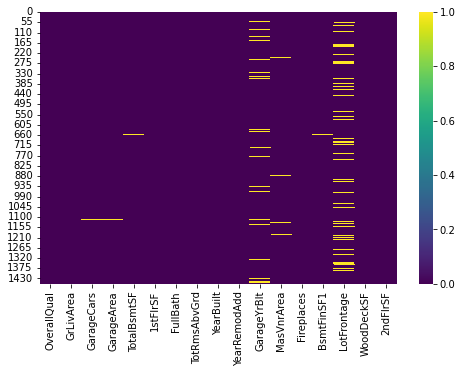

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(test.isnull(),cmap='viridis')

In [ ]:
test['GarageCars'].fillna(value=test['GarageCars'].mean(), inplace=True)
test['GarageArea'].fillna(value=test['GarageArea'].mean(), inplace=True)
test['TotalBsmtSF'].fillna(value=test['TotalBsmtSF'].mean(), inplace=True)
test['GarageYrBlt'].fillna(value=test['GarageYrBlt'].mean(), inplace=True)
test['MasVnrArea'].fillna(value=test['MasVnrArea'].mean(), inplace=True)
test['BsmtFinSF1'].fillna(value=test['BsmtFinSF1'].mean(), inplace=True)
test['LotFrontage'].fillna(value=test['LotFrontage'].mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
test = scaler.transform(test)

In [ ]:
submission_predictions = xgb_r.predict(test)

In [ ]:
output = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': submission_predictions})
output.to_csv('submission.csv', index=False)

Compare predicted and actual values for a randomly selected data example.

In [ ]:
rand_generator = np.random.randint(0,len(X)-1)
new_pred = scaler.transform(X.iloc[[rand_generator]]) #using double brackets for the iloc[[x]] returns a pandas DataFrame and not a Series.
actual = y[rand_generator] 
print('Compare Random Prediction with Actual Value\nPrediction:', xgb_r.predict(new_pred)[0],'\nActual:    ',actual)

Compare Random Prediction with Actual Value
Prediction: 234140.12 
Actual:     234000


### Conclusion

A range of machine learning models have been applied to the data set, with the xgboost regressor model giving the lowest root mean squared error when applied to the test set. The RMSE of around USD31,000 is not brilliant, given the mean sales price of USD181,000, however it does demonstrate the value of machine learning in predicting the sales price of a house given a number of input variables. 

This is quite a complex data set with 81 feature variables. I refined the variables used for my machine learning models by selecting those most strongly correlated with the sales price. I am sure that with further feature engineering and selection of the best variables a superior result could be obtained.